Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('data/train.csv')

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.head(2)

As dataset is already standardized

In [ ]:
df.describe()

Distribution

(Positive Distribution) Right skewed: Mean > Median> Mode

(Negative Distribution) left skewed: Mode > Median > Mean

(Normal Distribution) zero skewed: Mode = Median = Mean


![Skewness_1.webp](attachment:e0da53fe-e182-4afa-8215-a78337ee7103.webp)

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [ ]:

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


Visualization

In [ ]:
def plot_boxplot_and_skewness(df):
    """
    Plots a boxplot and skewness distribution for each numerical column in the dataset.
    """


    for col in numeric_features:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
        num_outliers = outliers.count()

        # Boxplot
        sns.boxplot(y=df[col], ax=axes[0], color='lightblue')
        axes[0].set_title(f'Boxplot of {col}\nOutliers: {num_outliers}')

        # Skewness distribution
        sns.histplot(df[col], kde=True, bins=30, ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Distribution & Skewness of {col}\nSkewness: {skew(df[col], nan_policy="omit"):.2f}')

        plt.tight_layout()
        plt.show()
plot_boxplot_and_skewness(df)

As We see that our data has some positive and negative skewness even after the  Standardization, so we can say that Standardization is only make our whole data in unit 0 to 1. We have to apply skewness techniques to make them normal distribution. But We think that outliers may cause skewness so we try remove outliers then check again

Or

We can use robust algorithms that are less sensitive to skewness. Some models that can work well with non-normal data include:

    Tree-based models: Random Forest, XGBoost, LightGBM
    Ensemble models: Boosting, Bagging methods
    These models do not assume any particular distribution of the data, and they can handle skewness effectively.

If we still face difficulties with skewness or non-normality, you could consider using non-parametric models which do not assume any specific data distribution. For example:

    K-nearest neighbors (KNN)
    Random Forest
    Support Vector Machines (SVM) with a kernel trick

These models can handle data that isn't normally distributed, and they do not require the assumption of normality in your features.

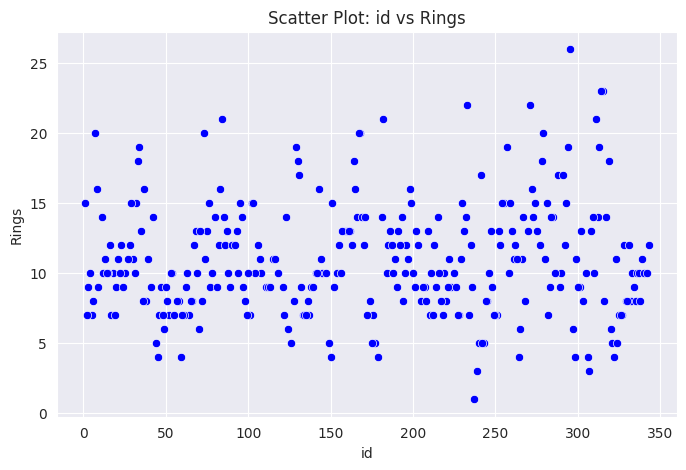

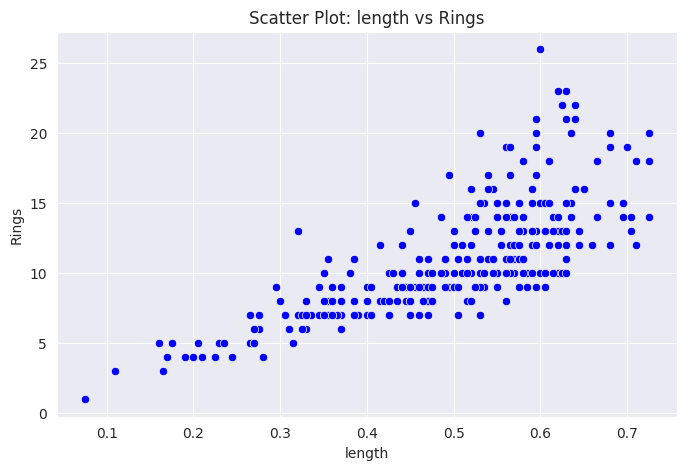

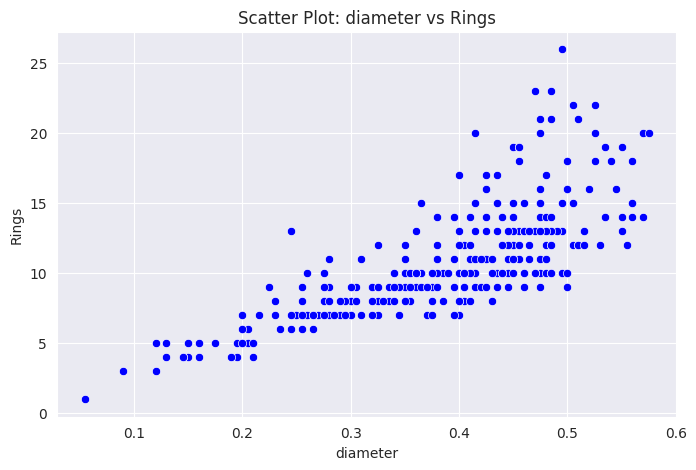

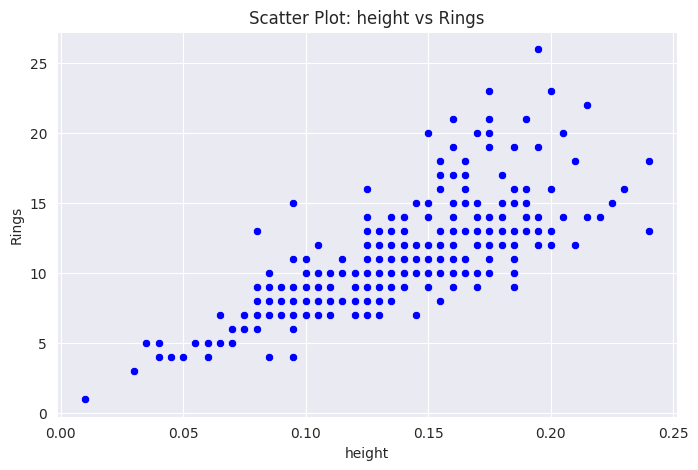

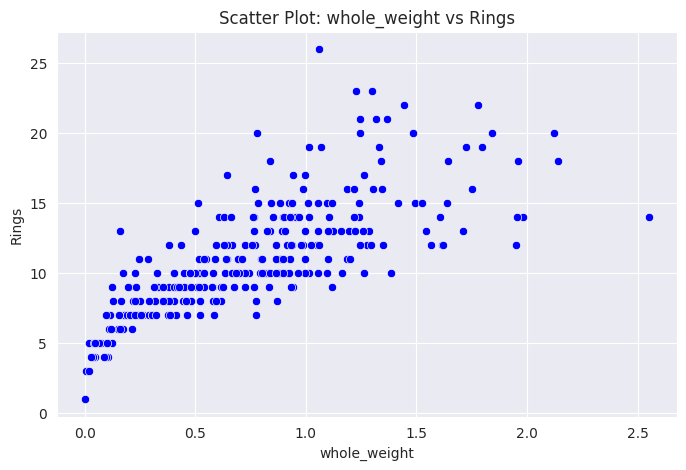

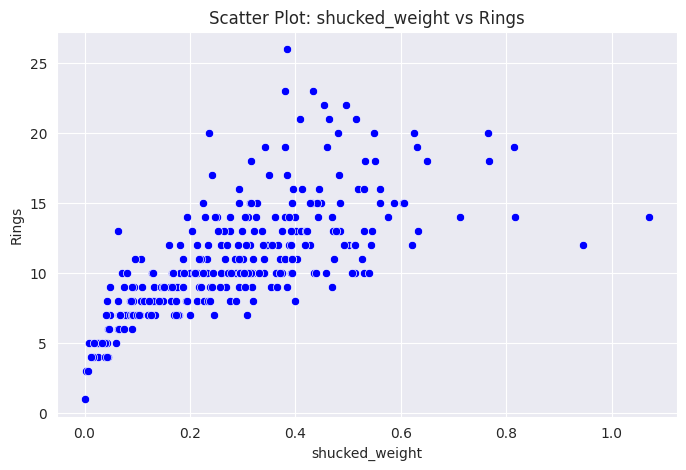

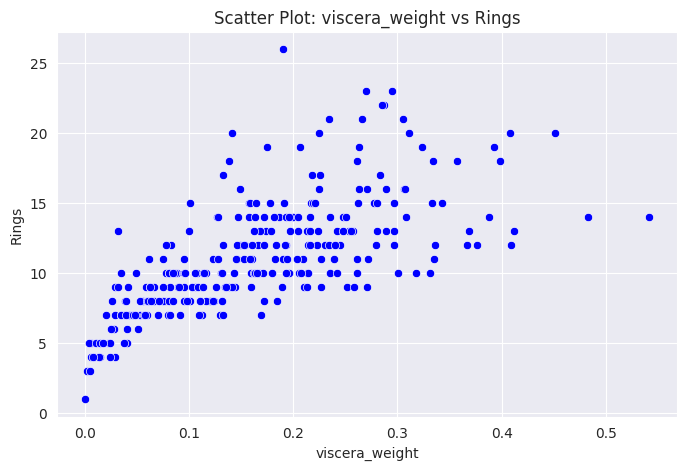

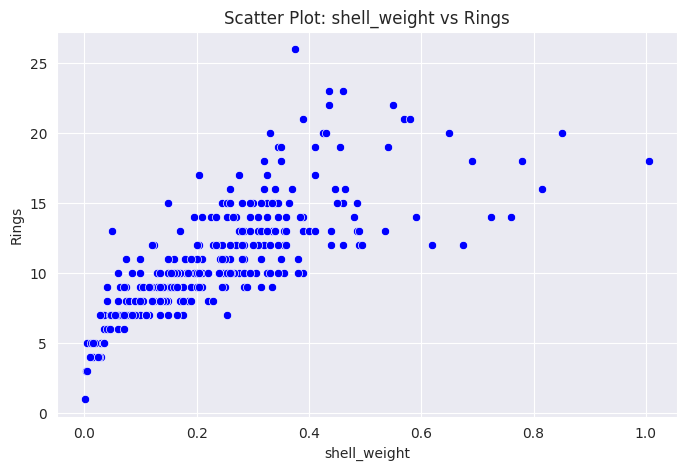

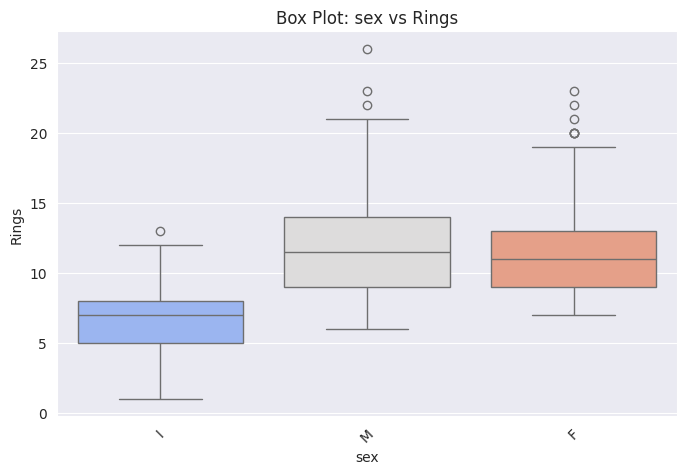

In [18]:
def plot_relationship_with_rings(df):
    """
    Creates scatter plots for numerical columns and box plots for categorical columns
    showing their relationship with the 'rings' column.
    """
    if 'rings' not in df.columns:
        print("The dataset does not contain a 'rings' column.")
        return

    if 'rings' in numeric_features:
        numeric_features.remove('rings')

    for col in numeric_features:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[col], y=df['rings'], color='blue')
        plt.title(f'Scatter Plot: {col} vs Rings')
        plt.xlabel(col)
        plt.ylabel('Rings')
        plt.show()

    for col in categorical_features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col], y=df['rings'], palette='coolwarm')
        plt.title(f'Box Plot: {col} vs Rings')
        plt.xlabel(col)
        plt.ylabel('Rings')
        plt.xticks(rotation=45)
        plt.show()
plot_relationship_with_rings(df)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('data/train.csv')

In [3]:
df.shape

(308, 10)

In [4]:
df.isnull().sum()

id                0
sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.head(2)

,id,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,6,I,0.425,0.30,0.095,0.3515,0.141,0.0775,0.12,8
1,210,I,0.370,0.28,0.095,0.2655,0.122,0.0520,0.08,7


As dataset is already standardized

In [9]:
df.describe()

,id,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.00000
mean,173.441558,0.491250,0.385601,0.135049,0.731093,0.285502,0.158534,0.234782,10.87987
std,100.524779,0.125718,0.103905,0.041822,0.476026,0.181122,0.101806,0.163721,4.03105
min,1.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.00000
25%,83.750000,0.415000,0.320000,0.105000,0.352625,0.140875,0.075375,0.115000,8.00000
50%,176.500000,0.515000,0.405000,0.135000,0.689000,0.274000,0.151000,0.210000,10.00000
75%,260.250000,0.580000,0.461250,0.165000,1.013000,0.394875,0.222875,0.325000,13.00000
max,343.000000,0.725000,0.575000,0.240000,2.550000,1.070500,0.541000,1.005000,26.00000


Distribution

(Positive Distribution) Right skewed: Mean > Median> Mode

(Negative Distribution) left skewed: Mode > Median > Mean

(Normal Distribution) zero skewed: Mode = Median = Mean


![Skewness_1.webp](attachment:e0da53fe-e182-4afa-8215-a78337ee7103.webp)

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [11]:

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 9 numerical features : ['id', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

We have 1 categorical features : ['sex']


Visualization

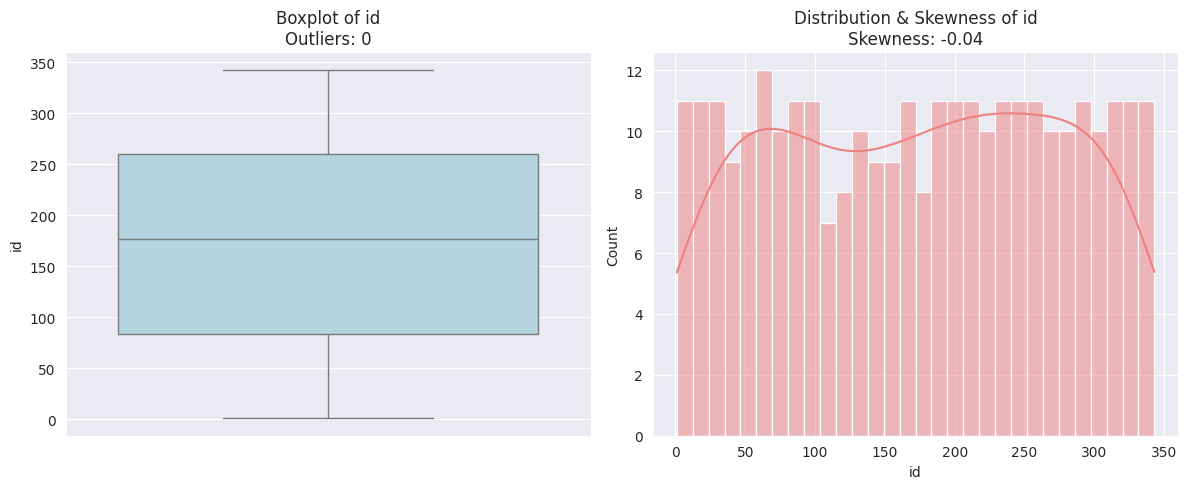

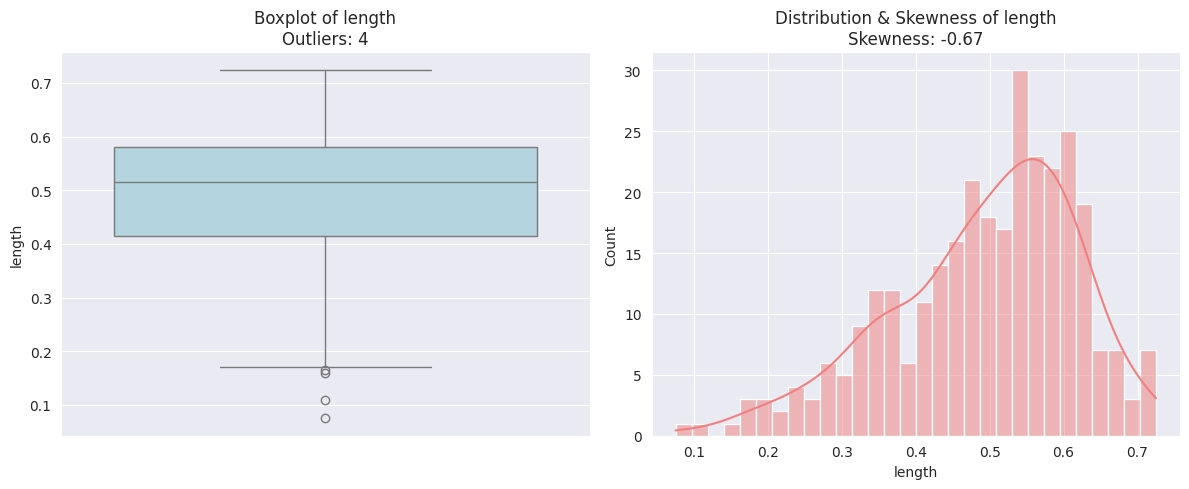

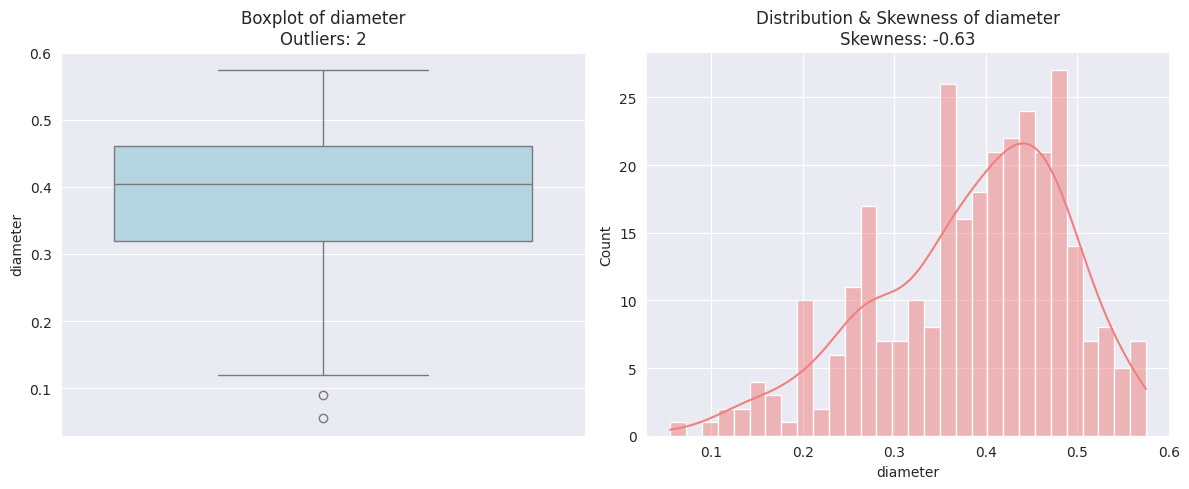

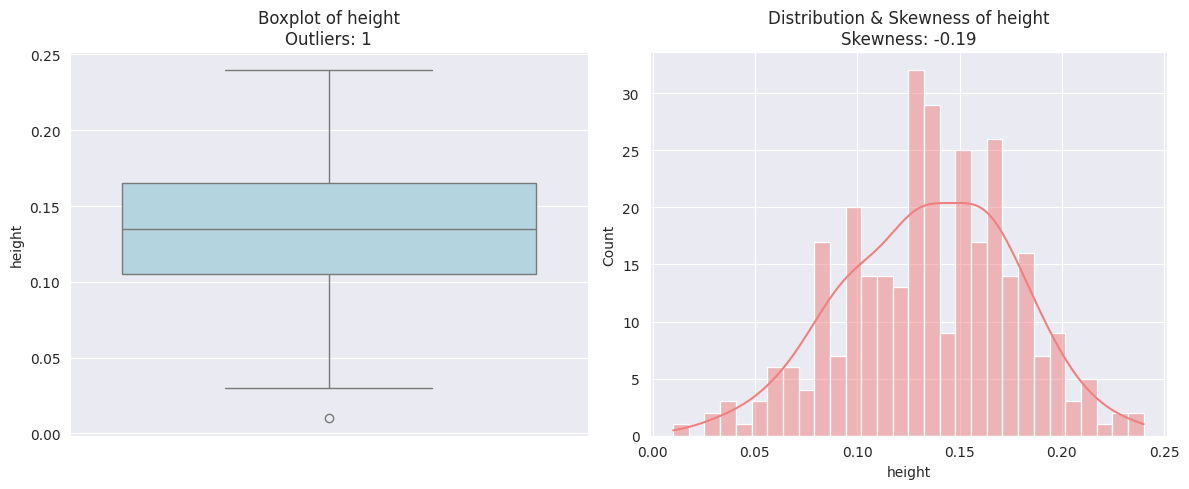

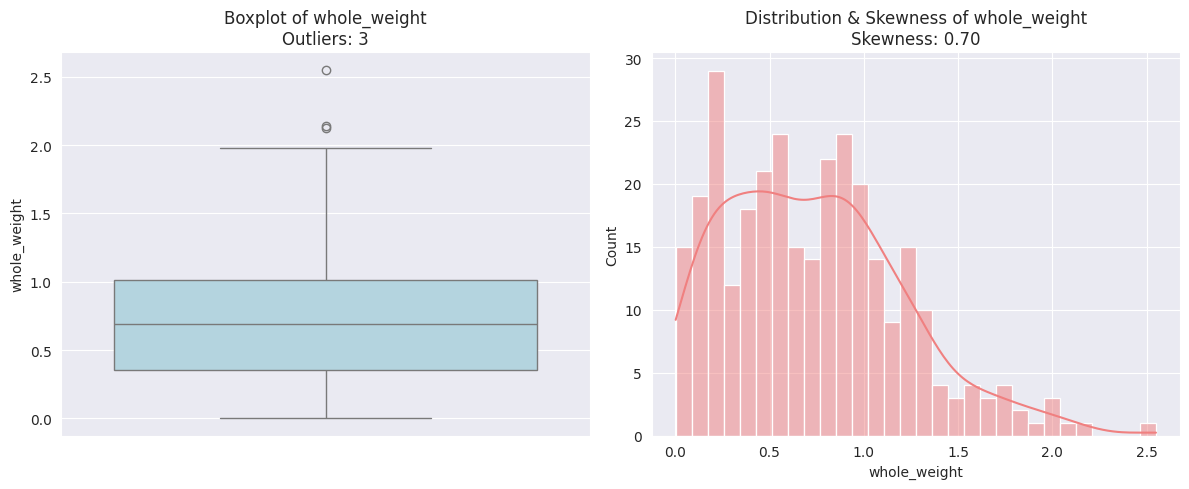

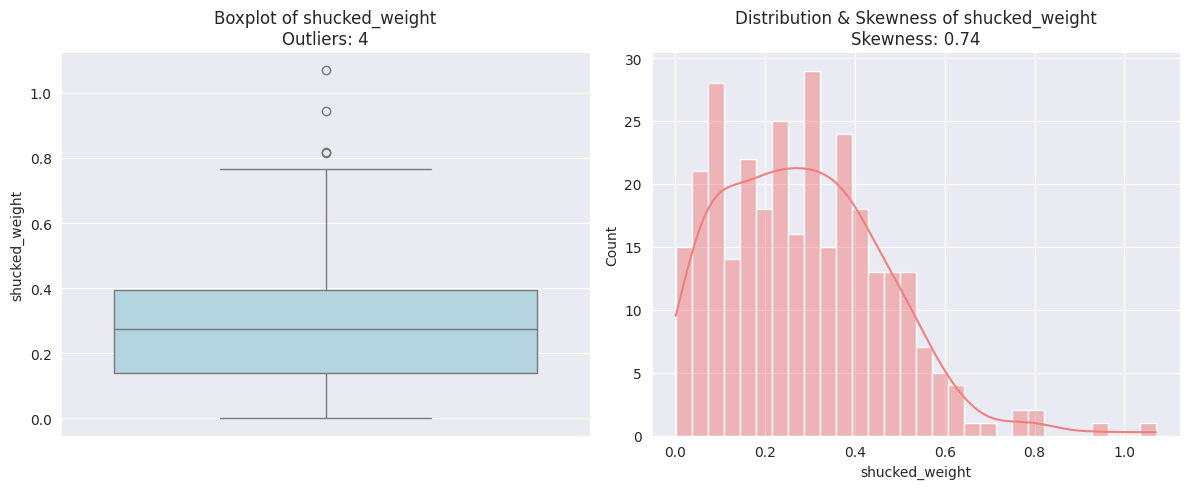

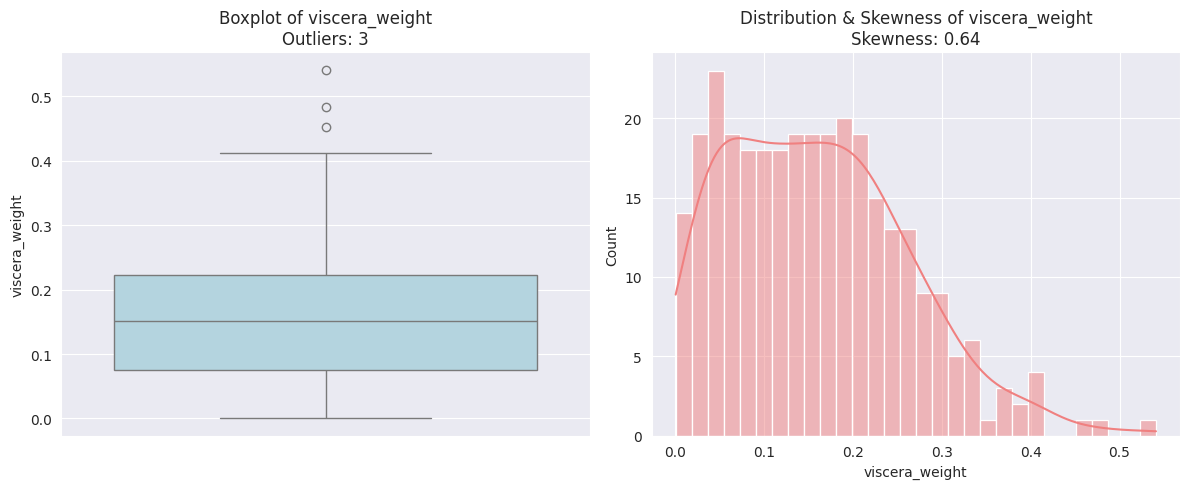

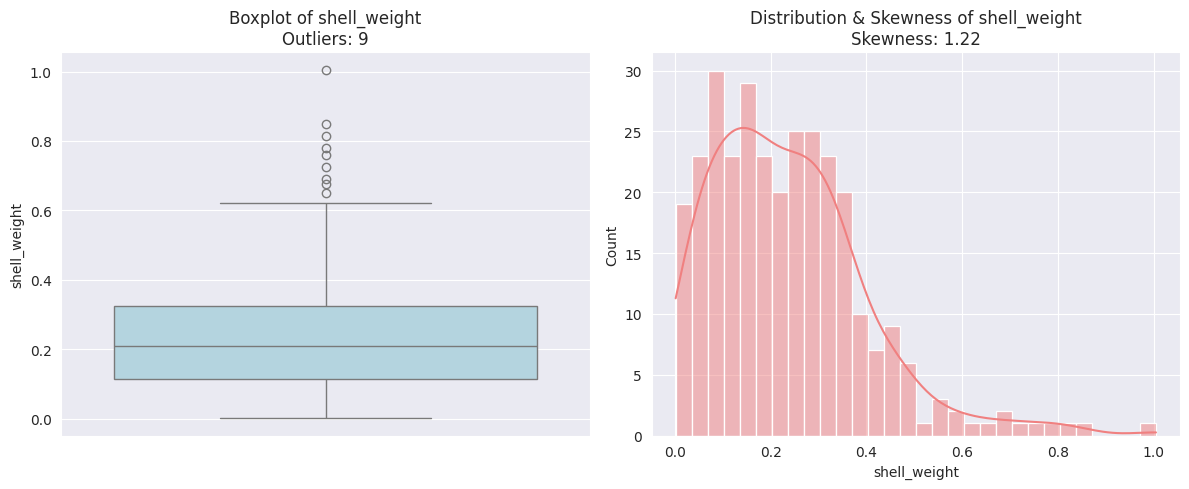

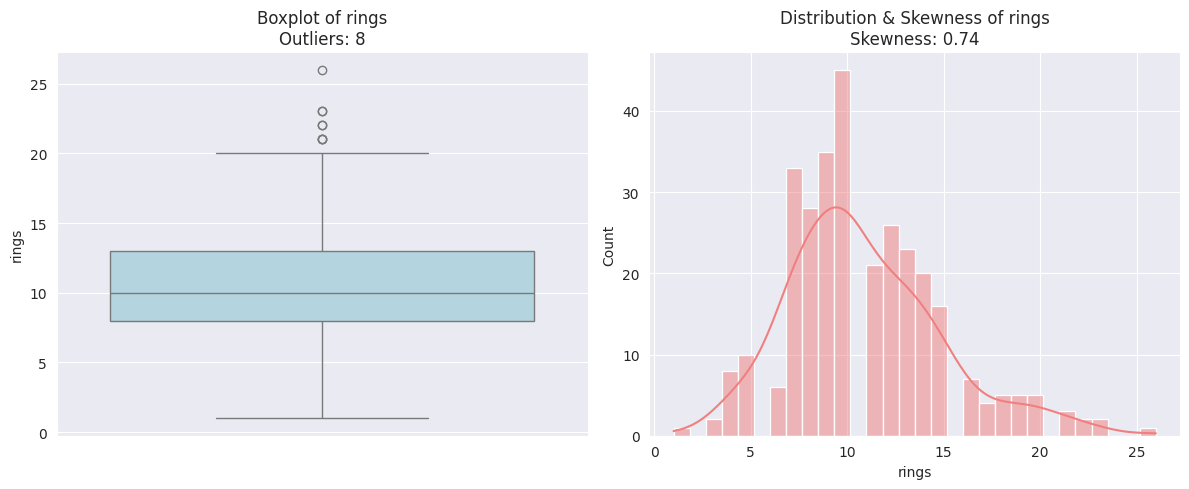

In [15]:
def plot_boxplot_and_skewness(df):
    """
    Plots a boxplot and skewness distribution for each numerical column in the dataset.
    """


    for col in numeric_features:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
        num_outliers = outliers.count()

        # Boxplot
        sns.boxplot(y=df[col], ax=axes[0], color='lightblue')
        axes[0].set_title(f'Boxplot of {col}\nOutliers: {num_outliers}')

        # Skewness distribution
        sns.histplot(df[col], kde=True, bins=30, ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Distribution & Skewness of {col}\nSkewness: {skew(df[col], nan_policy="omit"):.2f}')

        plt.tight_layout()
        plt.show()
plot_boxplot_and_skewness(df)

As We see that our data has some positive and negative skewness even after the  Standardization, so we can say that Standardization is only make our whole data in unit 0 to 1. We have to apply skewness techniques to make them normal distribution. But We think that outliers may cause skewness so we try remove outliers then check again

Or

We can use robust algorithms that are less sensitive to skewness. Some models that can work well with non-normal data include:

    Tree-based models: Random Forest, XGBoost, LightGBM
    Ensemble models: Boosting, Bagging methods
    These models do not assume any particular distribution of the data, and they can handle skewness effectively.

If we still face difficulties with skewness or non-normality, you could consider using non-parametric models which do not assume any specific data distribution. For example:

    K-nearest neighbors (KNN)
    Random Forest
    Support Vector Machines (SVM) with a kernel trick

These models can handle data that isn't normally distributed, and they do not require the assumption of normality in your features.